<a href="https://colab.research.google.com/github/01-Projects-In-Python/PredictionHousingPrices-Project/blob/main/Code-PredictionHousingPrices-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction Housing Prices

Purpose: to predict the housing prices of a town based on different features. In order to increase the precision of predictions, it is crucial to pre-process data and identify important features.

The dataset originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.
Dataset link: https://www.kaggle.com/datasets/avish5787/boston-data-set

__Dataset columns' description__<br>

The following describes the dataset columns:

__CRIM -__ per capita crime rate by town.<br>
__ZN -__ proportion of residential land zoned for lots over 25,000 sq.ft.<br>
__INDUS -__ proportion of non-retail business acres per town.<br>
__CHAS -__ Charles River dummy variable (1 if tract bounds river; 0 otherwise).<br>
__NOX -__ nitric oxides concentration (parts per 10 million).<br>
__RM -__ average number of rooms per dwelling.<br>
__AGE -__ proportion of owner-occupied units built prior to 1940.<br>
__DIS -__ weighted distances to five Boston employment centres.<br>
__RAD -__ index of accessibility to radial highways.<br>
__TAX -__ full-value property-tax rate per 10.000. <br>
__PTRATIO -__ pupil-teacher ratio by town.<br>
__B__ - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.<br>
__LSTAT -__ lower status of the population. <br>
__MEDV -__ Median value of owner-occupied homes in 1.000's.<br>

In this analysis you will find the next parts:

__Part 1:__ Validation of the data quality<br>
__Part 2:__ Univariate Analysis<br>
__Part 3:__ Data Transformation<br>
__Part 4:__ Bivariate Analysis<br>
__Part 5:__ Linear Regression Model<br>
__Part 6:__ Multiple Linear Regression Model<br>
__Part 7:__ Splitting the data<br>
__Part 8:__ Checking the model performance<br>
__Part 9:__ Adding Interactors<br>
__Part 10:__ Removing variables<br>
__Part 11:__ Decision Tree Regression<br>



In [ ]:
# importing the libraries needed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Importing the data

boston = pd.read_csv('C:\\Users\\User\\Documents\\PDD - Data analytics Term 2\\DANA-4810-001 - Predic Analytics-Quantv Data\\Assignments\\Assignment3\\boston.csv')
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Part 1: Validation of the data quality

In [ ]:
# Validating the shape
boston.shape

(506, 15)

We have the additional column 'Unaamed: 0' that must not be in the dataset according to the columns' description reason why I will drop it.

In [ ]:
boston = boston.drop(['Unnamed: 0'], axis = 1)

Modify the name of the 'price' column for MEDV to make it mach with the dataset columns' description:

In [ ]:
boston = boston.rename(columns = {'Price': 'MEDV'})

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Validaring the shape
boston.shape

(506, 14)

In [ ]:
# Validating the data type
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In this dataset, we have that all columns are float (numerical) which is a wrong assuption based on the data description, so we will modify the data type of the categorical variables.

In [ ]:
boston[['CHAS']] = boston[['CHAS']].astype(str)

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


In [ ]:
#Verifing null values
null_boston = boston.isnull().sum()
print(null_boston[null_boston > 0])

Series([], dtype: int64)


In [ ]:
#Verifing duplicated values
boston.duplicated().sum()

0

The Boston dataset contains a total of 13 features, there are no null nor missing values, I converted one numerical variable into a categorical variable.

### Part 2: Univariate Analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHAS', ylabel='count'>

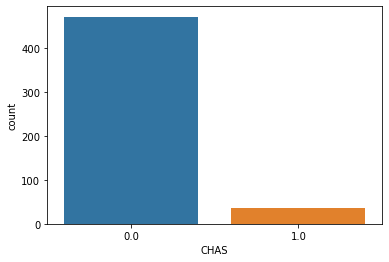

In [ ]:
# Creation of the bar plot for the categorical variable
sns.countplot(boston['CHAS'])

In [ ]:
# Validating the summary statistic of the dataset.
boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

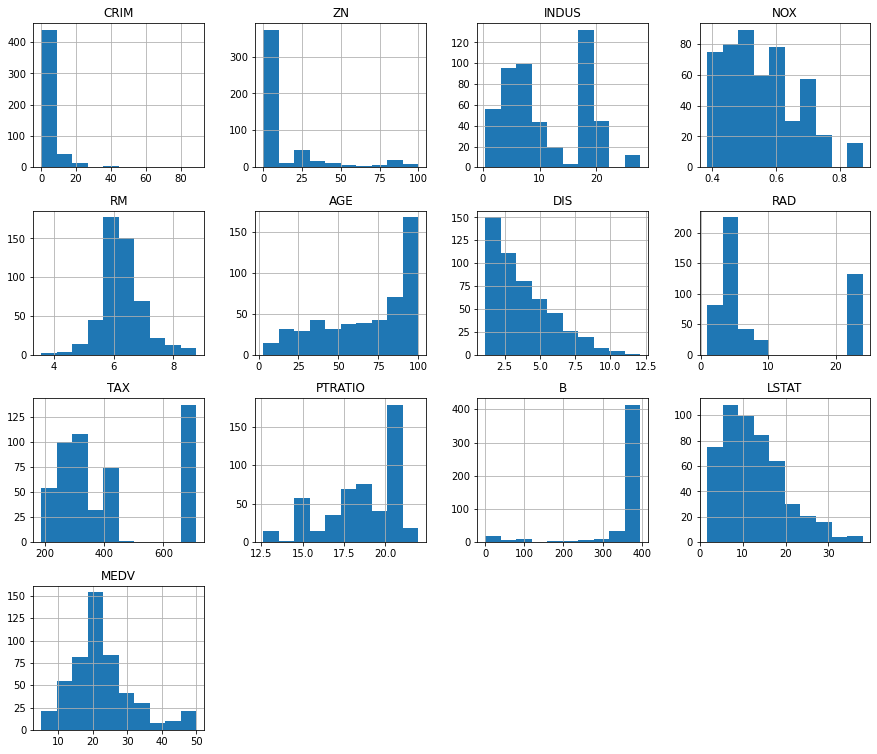

In [ ]:
# Creating histograms to verify the shape of the quantitative variables.
boston.hist(figsize = (15, 13))

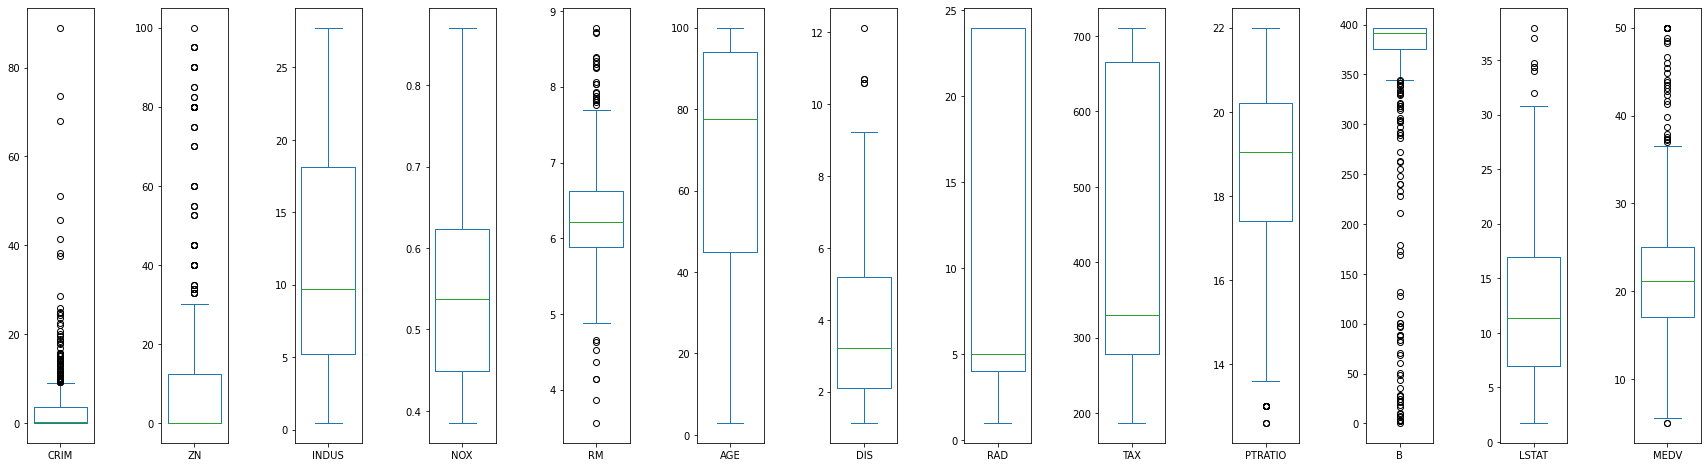

In [ ]:
# Creating box to validate the distribution of the numerical features.
boston.plot(kind = 'box', subplots = True, sharey = False, figsize = (30, 8), widths=0.8)
plt.subplots_adjust(wspace = 1)
plt.show()

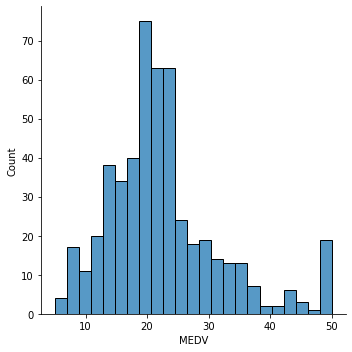

In [ ]:
# Validating the shape of the boston dataset response variable.
sns.displot(boston['MEDV'])

In [ ]:
# Verifing the skewness of each dataset feature.
boston.agg(['skew']).transpose()

,skew
CRIM,5.223149
ZN,2.225666
INDUS,0.295022
CHAS,3.405904
NOX,0.729308
RM,0.403612
AGE,-0.598963
DIS,1.011781
RAD,1.004815
TAX,0.669956


__Conclutions:__<br>

- In the Boston dataset, most of the buildings do not border the river.
- In the previous table we could validate how skew the data is, following you can fin the explanation of each variable skewness:<br>
 __Skewness__<br>
Fairly Symmetrical: -0.5 to 0.5<br>
Moderate Skewed: -0.5 to -1.0 and 0.5 to 1.0<br>
Highly Skewed: < -1.0 and > 1.0<br>


- __Direction of skewness in the dataset:__<br>

a. Right skewed variables: CRIM, ZN, NOX, DIS, LSTAT, MEDV, RAD<br>
b. Left skewed variables: AGE, PTRATIO, B, TAX<br>

In 'Part 3: Data Transformation' we will correct this skewness issues with the Log Transformation method for the right-skewed data and Squared Root Transformation for left skewed data.

### Part 3: Data Transformation

- Log Transformation for right skewed data:

In [ ]:
# Validating the column's names
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# List with the right skewed features
right_skewed = ['CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'LSTAT', 'MEDV']

In [ ]:
# Loop to tranform the skewed variables and create the new one in the dataset:
for x in range(len(right_skewed)):
    var = right_skewed[x]
    transformed = 'log_' + var
    boston[transformed] = np.log10(boston[var] + 1)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,MEDV,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,log_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,396.90,4.98,24.0,0.002736,1.278754,0.186956,0.706718,0.301030,0.776701,1.397940
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,396.90,9.14,21.6,0.011702,0.000000,0.167022,0.775763,0.477121,1.006038,1.354108
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,392.83,4.03,34.7,0.011693,0.000000,0.167022,0.775763,0.477121,0.701568,1.552668
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,394.63,2.94,33.4,0.013835,0.000000,0.163758,0.848940,0.602060,0.595496,1.536558
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,396.90,5.33,36.2,0.028998,0.000000,0.163758,0.848940,0.602060,0.801404,1.570543


- Squared Root Transformation for left skewed data:

In [ ]:
# List with the left skewed features
left_skewed = ['AGE', 'TAX','PTRATIO', 'B']

In [ ]:
# Loop to tranform the skewed variables and create the new one in the dataset:
for j in range(len(left_skewed)):
    var2 = left_skewed[j]
    transformed2 = 'squared_' + var2
    boston[transformed2] = np.sqrt(boston[var2] + 1)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,log_MEDV,squared_AGE,squared_TAX,squared_PTRATIO,squared_B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,1.278754,0.186956,0.706718,0.301030,0.776701,1.397940,8.136338,17.233688,4.037326,19.947431
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.000000,0.167022,0.775763,0.477121,1.006038,1.354108,8.938680,15.588457,4.335897,19.947431
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.000000,0.167022,0.775763,0.477121,0.701568,1.552668,7.880355,15.588457,4.335897,19.845151
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.000000,0.163758,0.848940,0.602060,0.595496,1.536558,6.841053,14.933185,4.438468,19.890450
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.000000,0.163758,0.848940,0.602060,0.801404,1.570543,7.429670,14.933185,4.438468,19.947431


In [ ]:
# Creating a copy of the dataset
boston1 = boston.copy()

In [ ]:
# Dropping the transformed variables
boston1 = boston1.drop(['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV'], axis = 1)

In [ ]:
boston1.head()

,INDUS,CHAS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,log_MEDV,squared_AGE,squared_TAX,squared_PTRATIO,squared_B
0,2.31,0.0,6.575,0.002736,1.278754,0.186956,0.706718,0.301030,0.776701,1.397940,8.136338,17.233688,4.037326,19.947431
1,7.07,0.0,6.421,0.011702,0.000000,0.167022,0.775763,0.477121,1.006038,1.354108,8.938680,15.588457,4.335897,19.947431
2,7.07,0.0,7.185,0.011693,0.000000,0.167022,0.775763,0.477121,0.701568,1.552668,7.880355,15.588457,4.335897,19.845151
3,2.18,0.0,6.998,0.013835,0.000000,0.163758,0.848940,0.602060,0.595496,1.536558,6.841053,14.933185,4.438468,19.890450
4,2.18,0.0,7.147,0.028998,0.000000,0.163758,0.848940,0.602060,0.801404,1.570543,7.429670,14.933185,4.438468,19.947431


At this point, we can visualize the difference between the scales of each feature, therefore I will scale the variables to reduce errors and create just one measurement unit in the dataset:

In [ ]:
# Features to scale
scale = ['INDUS', 'RM', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(boston1[scale])

#scale selected data
boston1[scale] = scaler.transform(boston1[scale])

The process finished in 'Part 3: Transformation' was to modify the shape of the skewed variables in order to make them more symmetric transforming the variables to normal (o near normal) distribution, and the scale of measurement of 6 features was changed, with these modifications I will reduce the possibility of errors during the analysis.

### Part 4: Bivariate Analysis

<AxesSubplot:>

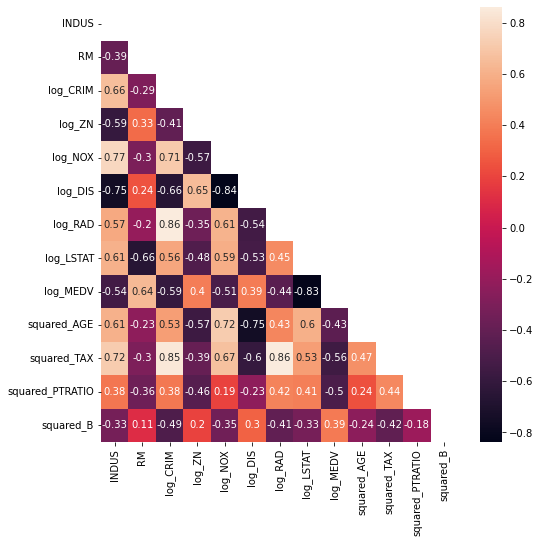

In [ ]:
#Creating the heatmap with the correlation between the variables
boston1_corr = boston1.corr()
matrix = np.triu(boston1_corr)
plt.figure(figsize = (8, 8))
sns.heatmap(boston1_corr, annot = True, mask = matrix)

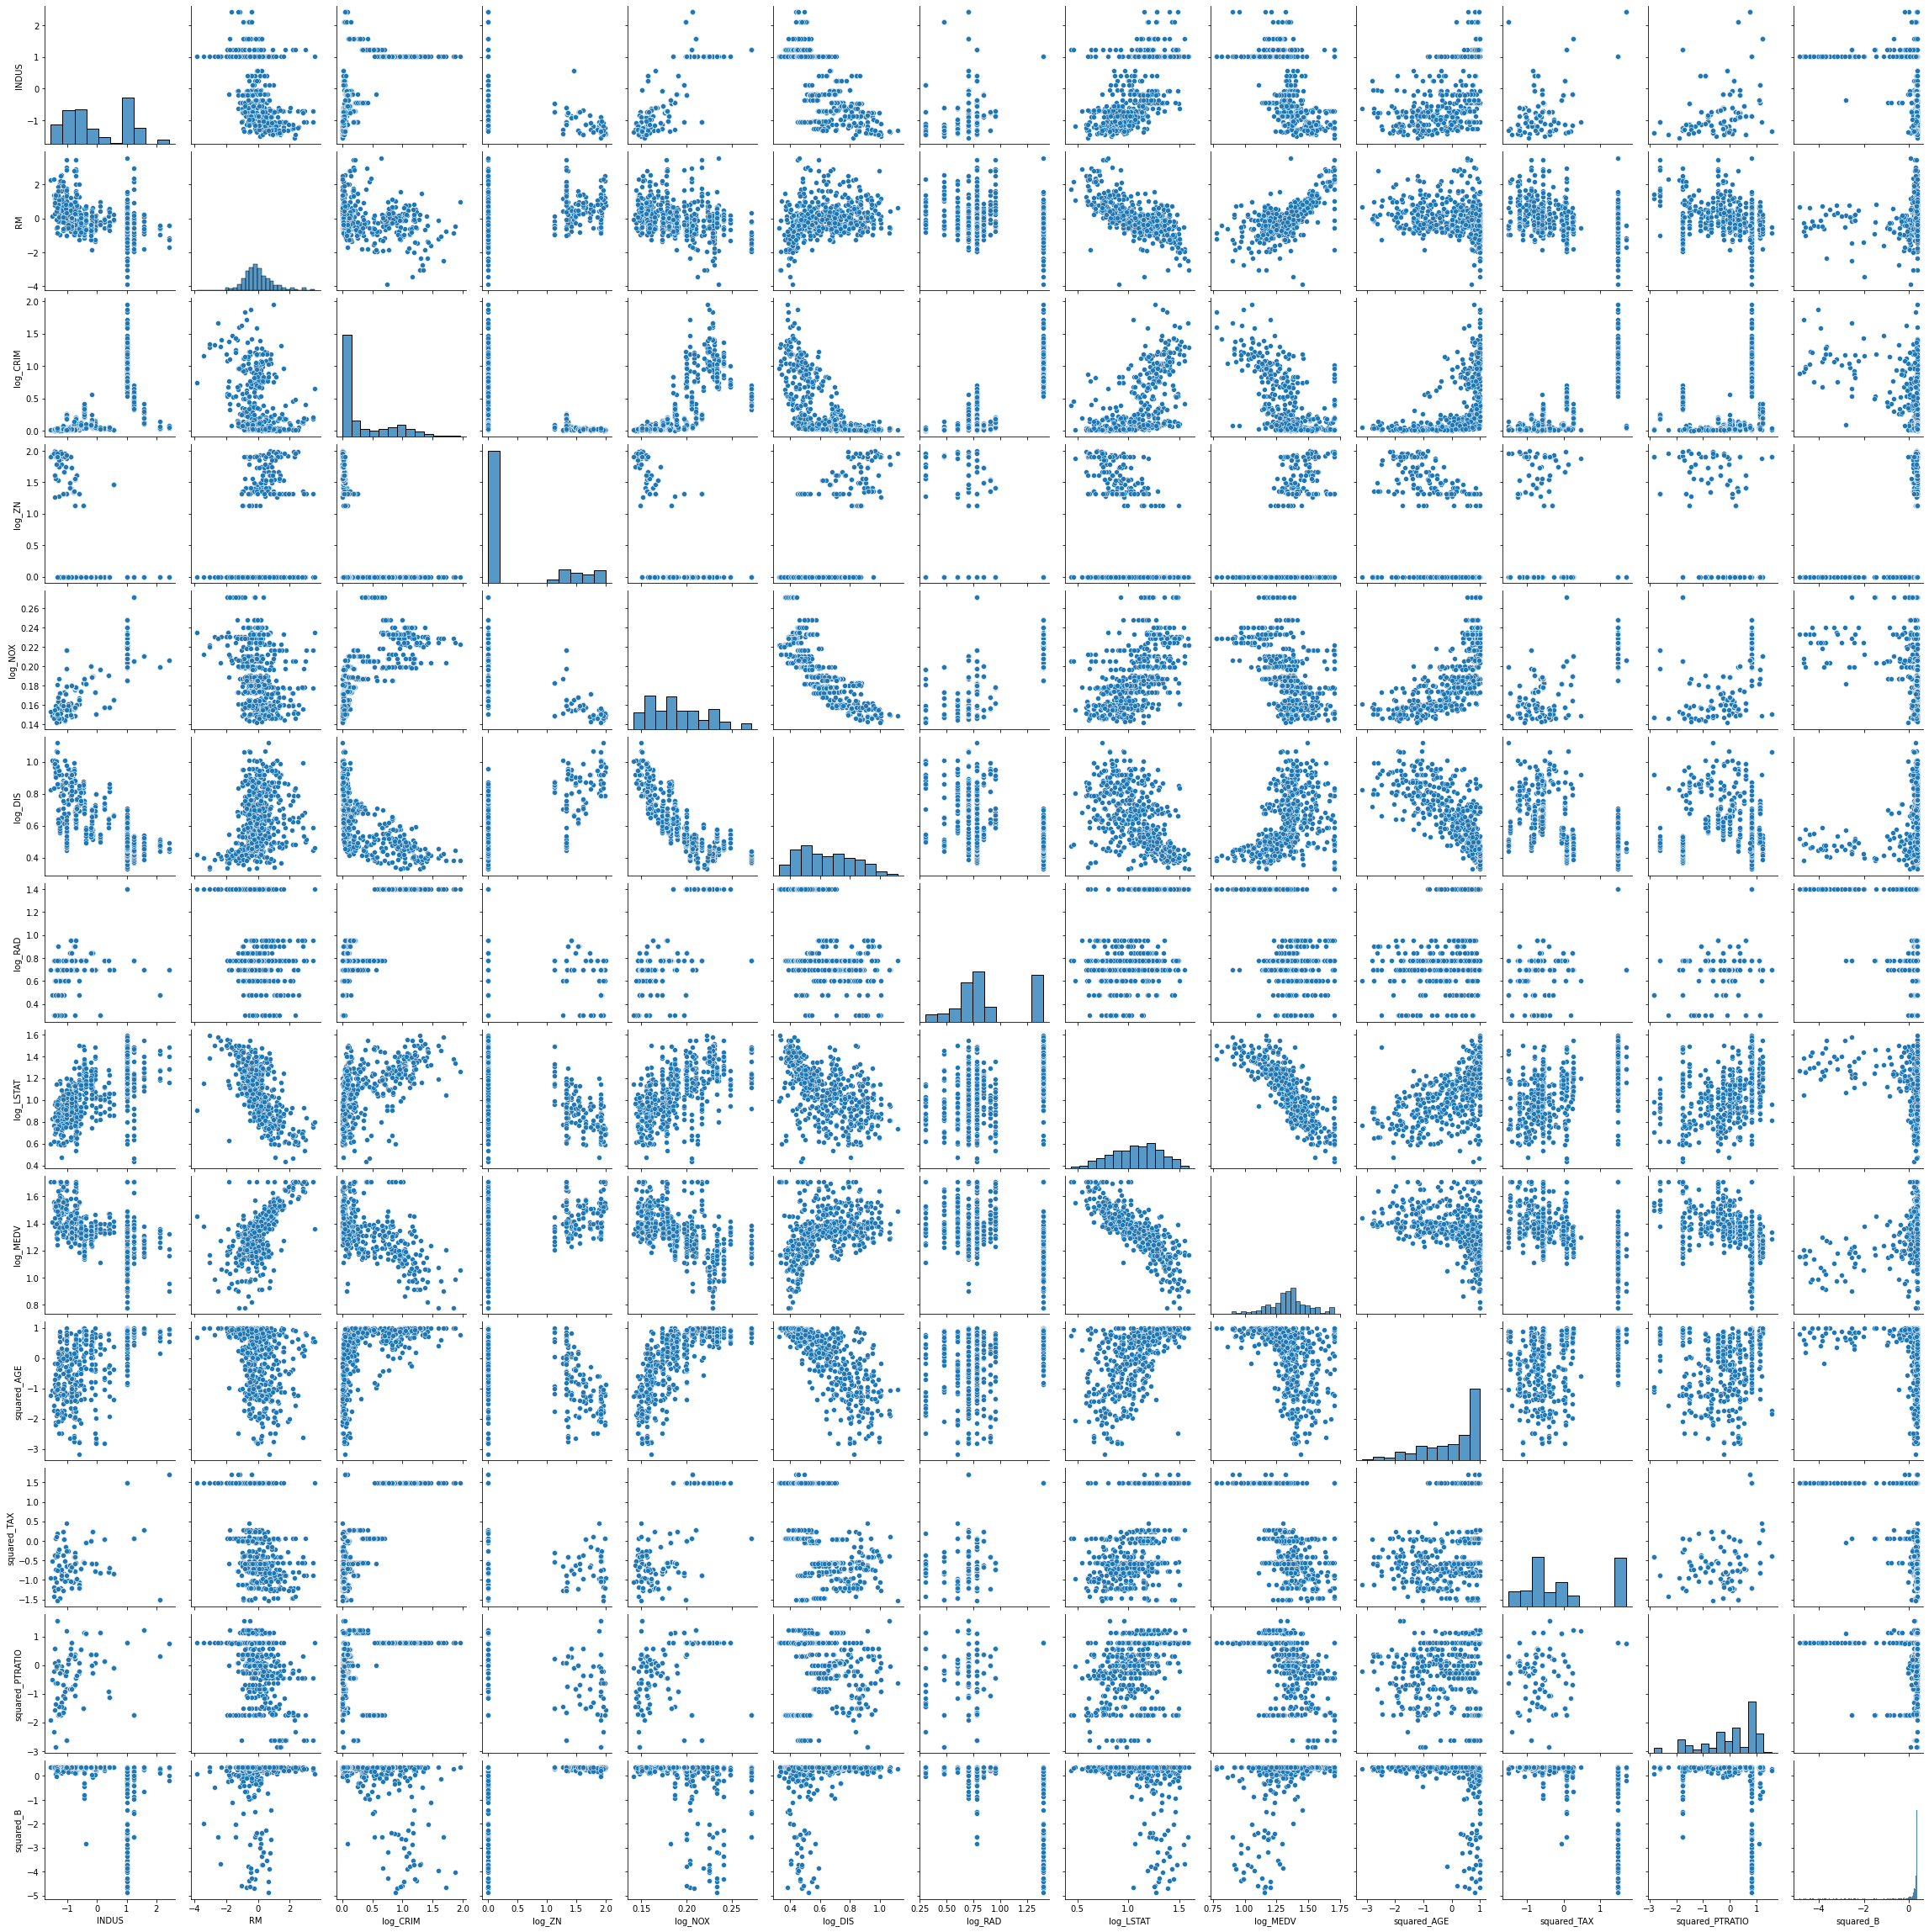

In [ ]:
# Creating the scatterplot for the dataset's numerical variables.
sns.pairplot(boston1)

In this Bivariate Analysis we could conclude:

- The variables with the strong positive correlation are:
a. Log_RAD (index of accessibility to radial highways) and log_CRIM (per capita crime rate by town): 0.86
b. Squared_TAX (full-value property-tax rate per 10.000) and Log_RAD (index of accessibility to radial highways): 0.86
- The variables with the strong negative correlation are:
a. Log_DIS (weighted distances to five Boston employment centres) and log_NOX (nitric oxides concentration): -0.84
b. Log_LSTAT (lower status of the population) and MEDV (Median value of owner-occupied homes): -0.83

### Part 5: Linear Regression Model

In [ ]:
#Reshaping the variables
CRIM = boston1.log_CRIM.values.reshape(len(boston1['log_CRIM']), 1)
ZN = boston1.log_ZN.values.reshape(len(boston1['log_ZN']), 1)
INDUS = boston1.INDUS.values.reshape(len(boston1['INDUS']), 1)
NOX = boston1.log_NOX.values.reshape(len(boston1['log_NOX']), 1)
RM = boston1.RM.values.reshape(len(boston1['RM']), 1)
AGE = boston1.squared_AGE.values.reshape(len(boston1['squared_AGE']), 1)
DIS = boston1.log_DIS.values.reshape(len(boston1['log_DIS']), 1)
RAD = boston1.log_RAD.values.reshape(len(boston1['log_RAD']), 1)
TAX = boston1.squared_TAX.values.reshape(len(boston1['squared_TAX']), 1)
PTRATIO = boston1.squared_PTRATIO.values.reshape(len(boston1['squared_PTRATIO']), 1)
B = boston1.squared_B.values.reshape(len(boston1['squared_B']), 1)
LSTAT = boston1.log_LSTAT.values.reshape(len(boston1['log_LSTAT']), 1)
MEDV = boston1.log_MEDV.values.reshape(len(boston1['log_MEDV']), 1)

In [ ]:
# Creating the simple linear regression model for each variable:

# CRIME - Crime:
crime_model = LinearRegression()
crime_model.fit(CRIM, MEDV)
coeffs_crime = np.array(list(crime_model.intercept_.flatten()) + list(crime_model.coef_.flatten()))
coeffs_crime = list(coeffs_crime)

# ZN - Land zoned for lots:
landzone_model = LinearRegression()
landzone_model.fit(ZN, MEDV)
coeffs_landzone = np.array(list(landzone_model.intercept_.flatten()) + list(landzone_model.coef_.flatten()))
coeffs_landzone = list(coeffs_landzone)

# INDUS - Non-retail business acres:
bus_acr_model = LinearRegression()
bus_acr_model.fit(INDUS, MEDV)
coeffs_bus_acr = np.array(list(bus_acr_model.intercept_.flatten()) + list(bus_acr_model.coef_.flatten()))
coeffs_bus_acr = list(coeffs_bus_acr)

# NOX - nitric oxides concentration:
nitric_model = LinearRegression()
nitric_model.fit(NOX, MEDV)
coeffs_nitric = np.array(list(nitric_model.intercept_.flatten()) + list(nitric_model.coef_.flatten()))
coeffs_nitric = list(coeffs_nitric)

# RM - Rooms:
rooms_model = LinearRegression()
rooms_model.fit(RM, MEDV)
coeffs_rooms = np.array(list(rooms_model.intercept_.flatten()) + list(rooms_model.coef_.flatten()))
coeffs_rooms = list(coeffs_rooms)

# Age:
age_model = LinearRegression()
age_model.fit(AGE, MEDV)
coeffs_age = np.array(list(age_model.intercept_.flatten()) + list(age_model.coef_.flatten()))
coeffs_age = list(coeffs_age)

# DIS - Weighted distances to five Boston employment centres:
employmentc_model = LinearRegression()
employmentc_model.fit(DIS, MEDV)
coeffs_employmentc = np.array(list(employmentc_model.intercept_.flatten()) + list(employmentc_model.coef_.flatten()))
coeffs_employmentc = list(coeffs_employmentc)

# RAD - index of accessibility to radial highways:
highways_model = LinearRegression()
highways_model.fit(RAD, MEDV)
coeffs_highways = np.array(list(highways_model.intercept_.flatten()) + list(highways_model.coef_.flatten()))
coeffs_highways = list(coeffs_highways)

# TAX - full-value property-tax rate per 10.000:
tax_model = LinearRegression()
tax_model.fit(TAX, MEDV)
coeffs_tax = np.array(list(tax_model.intercept_.flatten()) + list(tax_model.coef_.flatten()))
coeffs_tax = list(coeffs_tax)

# PTRATIO - pupil-teacher ratio by town:
ptratio_model = LinearRegression()
ptratio_model.fit(PTRATIO, MEDV)
coeffs_ptratio = np.array(list(ptratio_model.intercept_.flatten()) + list(ptratio_model.coef_.flatten()))
coeffs_ptratio = list(coeffs_ptratio)

# B - proportion of blacks by town:
color_model = LinearRegression()
color_model.fit(B, MEDV)
coeffs_color = np.array(list(color_model.intercept_.flatten()) + list(color_model.coef_.flatten()))
coeffs_color = list(coeffs_color)

# LSTAT - lower status of the population.
lowstat_model = LinearRegression()
lowstat_model.fit(LSTAT, MEDV)
coeffs_lowstat = np.array(list(lowstat_model.intercept_.flatten()) + list(lowstat_model.coef_.flatten()))
coeffs_lowstat = list(coeffs_lowstat)

In [ ]:
# R^2
crime_rsq = crime_model.score(CRIM, MEDV)
landzone_rsq = landzone_model.score(ZN, MEDV)
bus_acr_rsq = bus_acr_model.score(INDUS, MEDV)
nitric_rsq = nitric_model.score(NOX, MEDV)
rooms_rsq = rooms_model.score(RM, MEDV)
age_rsq = age_model.score(AGE, MEDV)
employmentc_rsq = employmentc_model.score(DIS, MEDV)
highways_rsq = highways_model.score(RAD, MEDV)
tax_rsq = tax_model.score(TAX, MEDV)
ptratio_rsq = ptratio_model.score(PTRATIO, MEDV)
color_rsq = color_model.score(B, MEDV)
lowstat_rsq = lowstat_model.score(LSTAT, MEDV)

rsq_results = [crime_rsq, landzone_rsq, bus_acr_rsq, nitric_rsq, rooms_rsq, age_rsq, employmentc_rsq, highways_rsq, tax_rsq, ptratio_rsq, color_rsq, lowstat_rsq]

In [ ]:
# Results:

lrm_boston1 = {}
lrm_boston1['log_CRIM'] = coeffs_crime
lrm_boston1['log_ZN'] = coeffs_landzone
lrm_boston1['INDUS'] = coeffs_bus_acr
lrm_boston1['log_NOX'] = coeffs_nitric
lrm_boston1['RM'] = coeffs_rooms
lrm_boston1['squared_AGE'] = coeffs_age
lrm_boston1['log_DIS'] = coeffs_employmentc
lrm_boston1['log_RAD'] = coeffs_highways
lrm_boston1['squared_TAX'] = coeffs_tax
lrm_boston1['squared_PTRATIO'] = coeffs_ptratio
lrm_boston1['squared_B'] = coeffs_color
lrm_boston1['log_LSTAT'] = coeffs_lowstat

metrics_boston1 = pd.DataFrame(lrm_boston1, index = ['Intercept', 'Coefficient'])
metrics_boston1.loc['R-squared'] = rsq_results
metrics_boston1

,log_CRIM,log_ZN,INDUS,log_NOX,RM,squared_AGE,log_DIS,log_RAD,squared_TAX,squared_PTRATIO,squared_B,log_LSTAT
Intercept,1.419450,1.300408,1.339988,1.857329,1.339988,1.339988,1.104960,1.544286,1.339988,1.339988,1.339988,1.978653
Coefficient,-0.224938,0.095543,-0.090872,-2.716043,0.107012,-0.072074,0.365743,-0.228969,-0.093793,-0.083959,0.065436,-0.594028
R-squared,0.353430,0.160151,0.292960,0.262151,0.406263,0.184288,0.152661,0.197907,0.312093,0.250081,0.151906,0.684698


In [ ]:
# Plotting the variables:
def plot(variables):
    sns.jointplot( x = boston1[variables], y = boston1['log_MEDV'], kind = 'reg', joint_kws={'line_kws':{'color':'cyan'}})

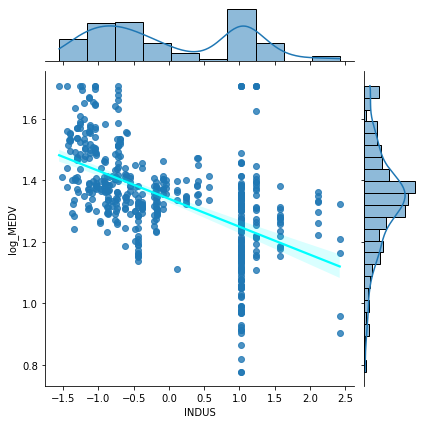

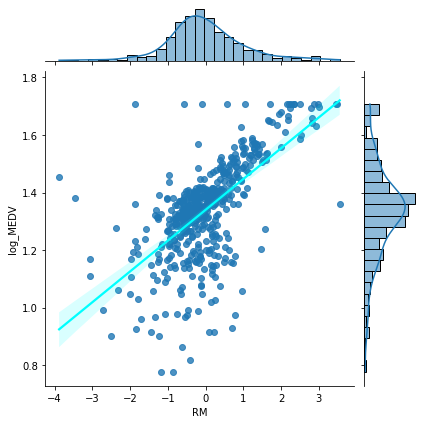

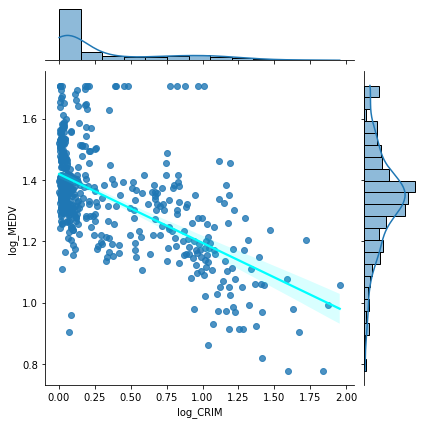

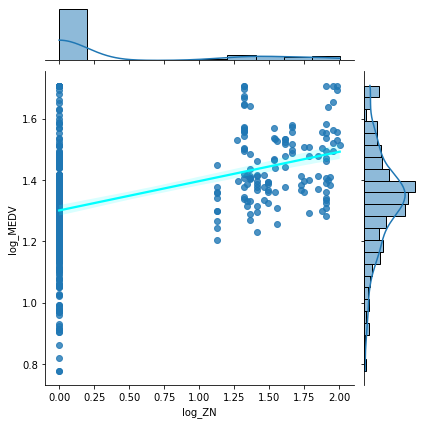

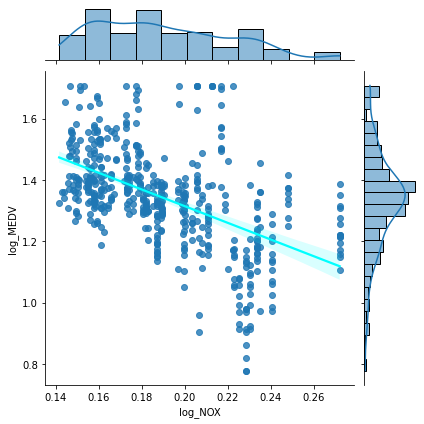

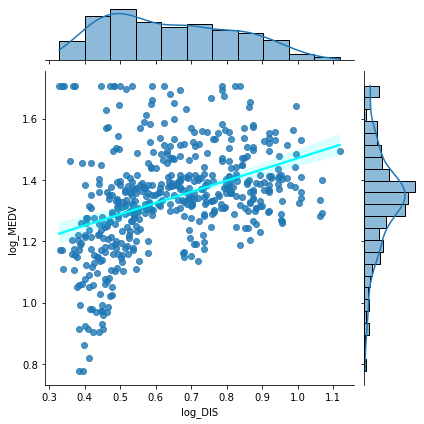

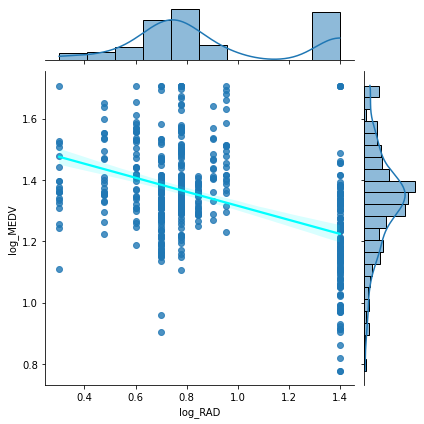

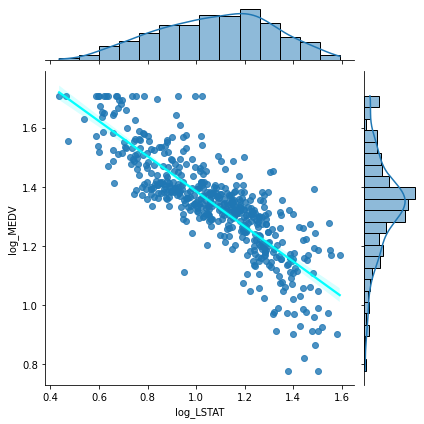

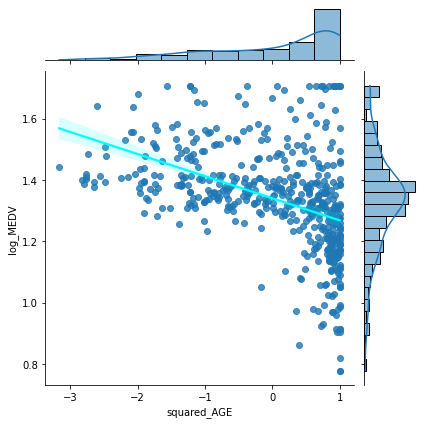

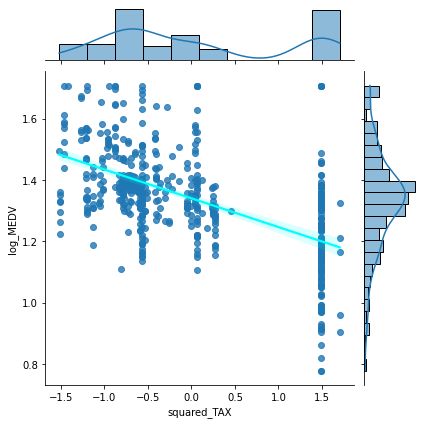

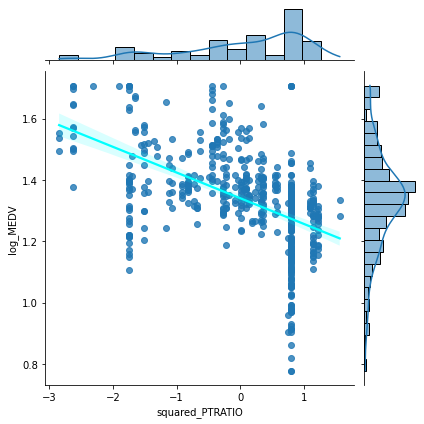

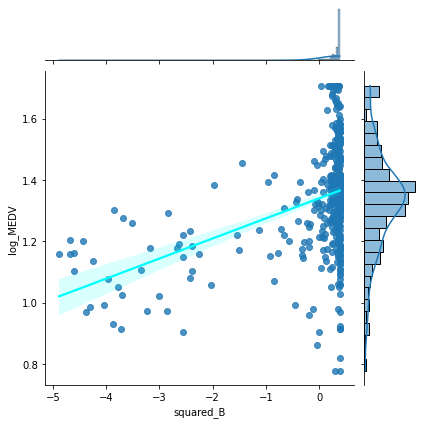

In [ ]:
NumVar = ['INDUS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B']
for x in NumVar:
    plot(x)

In the Part 5 the Linear Regression Model was created in order to know if any explanatory features of the dataset could predict the response variable (log_MEDV), the summary table showed us that the log_LSTAT has the highest R-squared value (0.68) followed by RM (0.40), log_CRIM (0.35), and squared_TAX (0.31).
The log_NOX variable has the lowest coefficient which means that if this variable increases by 1 unit, the house price will decrease by $2.716.

### Part 6: Multiple Linear Regression Model

In [ ]:
# adding all predictors into the linear equation
mlr_model = LinearRegression()
mlr_model.fit(boston1[['INDUS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B']], boston1['log_MEDV'])

LinearRegression()

In [ ]:
# Creating the predicted mpg variable and the error variable in the dataset
boston1['price_predicted']  = mlr_model.predict(boston1[['INDUS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B']])
boston1['error'] = (boston1['price_predicted'] - boston1['log_MEDV'])**2

In [ ]:
# Calculating the Mean Squared Error (MSE) of the model
MSE_mlr = boston1['error'].mean()
MSE_mlr

0.005741068493581787

In [ ]:
mlr_Rsq = mlr_model.score(boston1[['INDUS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B']], boston1['log_MEDV'])
mlr_Rsq

0.796324668511126

In [ ]:
# Detailed information of the MLR model:

mlr = smf.ols(formula = 'log_MEDV ~ INDUS + RM + log_CRIM + log_ZN + log_NOX + log_DIS + log_RAD + log_LSTAT + squared_AGE + squared_TAX + squared_PTRATIO + squared_B', data = boston1).fit()
mlr.params
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.17e-161
Time:                        22:45:10   Log-Likelihood:                 587.52
No. Observations:                 506   AIC:                            -1149.
Df Residuals:                     493   BIC:                            -1094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0181      0.066     

---> Multiple Linear Regression Model results:

The p- values with the lowest statistical significance are log_ZN (0.751), followed by INDUS (0.347) and squared_AGE (0.168)
The R-square of the Multiple Linear Regression Model is 0.797 which is better than the result that we had in the Simple Linear Regression Model.

MSE: The average squared error for the model is 0.0057.
There is no multicollinearity affecting the performance of the model.

### Part 7: Splitting the data that we will use to train and test the models

In [ ]:
boston1.columns

Index(['INDUS', 'CHAS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS',
       'log_RAD', 'log_LSTAT', 'log_MEDV', 'squared_AGE', 'squared_TAX',
       'squared_PTRATIO', 'squared_B', 'price_predicted', 'error'],
      dtype='object')

In [ ]:
# Deleting the features created
boston1.drop(columns = ["error", "price_predicted"], inplace = True)

In [ ]:
boston1.head()

,INDUS,CHAS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,log_MEDV,squared_AGE,squared_TAX,squared_PTRATIO,squared_B
0,-1.287909,0.0,0.413672,0.002736,1.278754,0.186956,0.706718,0.301030,0.776701,1.397940,0.012326,-0.644260,-1.454112,0.385353
1,-0.593381,0.0,0.194274,0.011702,0.000000,0.167022,0.775763,0.477121,1.006038,1.354108,0.425913,-1.053216,-0.268922,0.385353
2,-0.593381,0.0,1.282714,0.011693,0.000000,0.167022,0.775763,0.477121,0.701568,1.552668,-0.119626,-1.053216,-0.268922,0.356680
3,-1.306878,0.0,1.016303,0.013835,0.000000,0.163758,0.848940,0.602060,0.595496,1.536558,-0.655359,-1.216097,0.138241,0.369379
4,-1.306878,0.0,1.228577,0.028998,0.000000,0.163758,0.848940,0.602060,0.801404,1.570543,-0.351942,-1.216097,0.138241,0.385353


In [ ]:
# Creating the lists for the training and testing process
xbase = boston1[['INDUS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B']]
y = boston1[['log_MEDV']]

In [ ]:
xbase_train, xbase_test, y_train, y_test = train_test_split(xbase, y, random_state = 101, train_size = 0.70)

In [ ]:
# Validating the shape
xbase_train.shape, xbase_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354, 1), (152, 1))

In [ ]:
xbase_train.head()

,INDUS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B
204,-1.233923,2.492249,0.008638,1.982271,0.151094,0.786609,0.698970,0.588832,-1.225061,-1.199489,-1.751841,0.340553
370,1.015999,1.041946,0.877300,0.000000,0.212454,0.342896,1.397940,0.597695,0.934189,1.491618,0.796699,0.351168
485,1.015999,0.038987,0.669658,0.000000,0.199481,0.698248,1.397940,1.063709,-0.432579,1.491618,0.796699,0.326865
86,-0.969827,-0.384137,0.021966,0.000000,0.161068,0.734576,0.602060,1.141763,-0.681831,-1.013554,0.048577,0.378955
241,-0.905627,-0.270164,0.043802,1.491362,0.154728,0.865465,0.845098,1.127105,0.009158,-0.615510,-0.827283,0.369309


### Part 8: Checking the performance of the multilinear regression model base

In [ ]:
mlr_model = LinearRegression()
mlr_model.fit(xbase_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = mlr_model.predict(xbase_train)

In [ ]:
y_pred = mlr_model.predict(xbase_test)
xbase_test['y_pred'] = y_pred
xbase_test.head()

,INDUS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B,y_pred
195,-1.557842,2.265728,0.005957,1.908485,0.152900,0.822717,0.69897,0.598791,-1.220571,-0.950918,-1.902839,0.366560,1.657333
4,-1.306878,1.228577,0.028998,0.000000,0.163758,0.848940,0.60206,0.801404,-0.351942,-1.216097,0.138241,0.385353,1.481471
434,1.015999,-0.109178,1.173577,0.000000,0.233757,0.508152,1.39794,1.208710,0.868848,1.491618,0.796699,-2.380495,1.169993
458,1.015999,0.023315,0.942119,0.000000,0.233757,0.577848,1.39794,1.236285,0.562297,1.491618,0.796699,-0.572931,1.193411
39,-1.194528,0.442165,0.011837,1.880814,0.154728,0.806255,0.60206,0.725912,-1.720389,-0.974291,-0.041547,0.376421,1.491465


In [ ]:
y_train.shape

(354, 1)

In [ ]:
xbase_test = xbase_test.drop(['y_pred'], axis = 1)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R-Squared:", mlr_model.score(xbase_train, y_train))

Mean Absolute Error (MAE): 0.052799521981635275
Mean Squared Error (MSE): 0.005347282870642117
Root Mean Squared Error (RMSE): 0.07312511791882538
R-Squared: 0.7958716654422366


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared:", mlr_model.score(xbase_test, y_test))

Mean Absolute Error (MAE): 0.05935553781270691
Mean Squared Error (MSE): 0.006758479547256654
Root Mean Squared Error (RMSE): 0.08220997231027787
R-Squared: 0.7906003993224614


Validating the performance of the model with Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
mlr_model_scores = cross_val_score(mlr_model, xbase_train, y_train, cv = 10)
print("Mean cross validation score: {}".format(np.mean(mlr_model_scores)))

Mean cross validation score: 0.7606789234903005


In [ ]:
mlr_model_scores_test = cross_val_score(mlr_model, xbase_test, y_test, cv = 10)
print("Mean cross validation score: {}".format(np.mean(mlr_model_scores_test)))

Mean cross validation score: 0.6851174602689583


---> Checking the performance of the Multiple Linear Model, we have almos the same values for the train and the test data:<b>

- Mean Absolute Error (MAE): 0.059
- Mean Squared Error (MSE): 0.0067
- Root Mean Squared Error (RMSE): 0.082
- R-Squared: 0.79

If we compare this MSE with the MSE value of the Multiple Linear Regression (0.0057) it is a little bit higher but the model is underfitted because there are low errors (variance) in our test data.
The mean cross-validation score is 76% for the train data and 68% for the test data which are good indicators of the model's performance.

### Part 9: Adding Interactors

Creating interactor with the variables with highest correlation looking for improve the model.

- Squared_Tax and log_RAD: 0.86 (Full-value property tax rate and Index of accesibility to radial highways).
- Log_RAD and log_CRIM: 0.86 (Index of accesibility to radial highways and and crime rate by town).

In [ ]:
# Creating the intecators features
boston1['TAXandRAD'] = boston1['squared_TAX']*boston1['log_RAD']
boston1['RADandCRIM'] = boston1['log_RAD']*boston1['log_CRIM']

In [ ]:
# Creating the model including the interactors
mlr2 = smf.ols(formula = 'log_MEDV ~ INDUS + RM + log_CRIM + log_ZN + log_NOX + log_DIS + log_RAD + log_LSTAT + squared_AGE + squared_TAX + squared_PTRATIO + squared_B + TAXandRAD + RADandCRIM', data = boston1).fit()
mlr2.params
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          2.98e-172
Time:                        23:10:34   Log-Likelihood:                 618.07
No. Observations:                 506   AIC:                            -1206.
Df Residuals:                     491   BIC:                            -1143.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0800      0.064     

In [ ]:
# Splitting the data with the interactors to evaluate the model's performance
xbase1 = boston1[['INDUS', 'RM', 'log_CRIM', 'log_ZN', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B', 'TAXandRAD', 'RADandCRIM']]
y1 = boston1[['log_MEDV']]

In [ ]:
xbase1_train, xbase1_test, y1_train, y1_test = train_test_split(xbase1, y1, random_state = 101, train_size = 0.70)

In [ ]:
xbase1_train.shape, xbase1_test.shape, y1_train.shape, y1_test.shape

((354, 14), (152, 14), (354, 1), (152, 1))

In [ ]:
xbase1_train.head()

,INDUS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B,TAXandRAD,RADandCRIM
204,-1.233923,2.492249,0.008638,1.982271,0.151094,0.786609,0.698970,0.588832,-1.225061,-1.199489,-1.751841,0.340553,-0.838407,0.006038
370,1.015999,1.041946,0.877300,0.000000,0.212454,0.342896,1.397940,0.597695,0.934189,1.491618,0.796699,0.351168,2.085192,1.226413
485,1.015999,0.038987,0.669658,0.000000,0.199481,0.698248,1.397940,1.063709,-0.432579,1.491618,0.796699,0.326865,2.085192,0.936142
86,-0.969827,-0.384137,0.021966,0.000000,0.161068,0.734576,0.602060,1.141763,-0.681831,-1.013554,0.048577,0.378955,-0.610220,0.013225
241,-0.905627,-0.270164,0.043802,1.491362,0.154728,0.865465,0.845098,1.127105,0.009158,-0.615510,-0.827283,0.369309,-0.520166,0.037017


- Checking the performance of the interactors in the multilinear regression model

In [ ]:
mlr_model2 = LinearRegression()
mlr_model2.fit(xbase1_train, y1_train)

LinearRegression()

In [ ]:
y_pred_train2 = mlr_model2.predict(xbase1_train)

In [ ]:
y1_pred = mlr_model2.predict(xbase1_test)
xbase1_test['y1_pred'] = y1_pred
xbase1_test.head()

,INDUS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B,TAXandRAD,RADandCRIM,y1_pred
195,-1.557842,2.265728,0.005957,1.908485,0.152900,0.822717,0.69897,0.598791,-1.220571,-0.950918,-1.902839,0.366560,-0.664663,0.004163,1.661871
4,-1.306878,1.228577,0.028998,0.000000,0.163758,0.848940,0.60206,0.801404,-0.351942,-1.216097,0.138241,0.385353,-0.732163,0.017459,1.485919
434,1.015999,-0.109178,1.173577,0.000000,0.233757,0.508152,1.39794,1.208710,0.868848,1.491618,0.796699,-2.380495,2.085192,1.640590,1.147184
458,1.015999,0.023315,0.942119,0.000000,0.233757,0.577848,1.39794,1.236285,0.562297,1.491618,0.796699,-0.572931,2.085192,1.317025,1.196447
39,-1.194528,0.442165,0.011837,1.880814,0.154728,0.806255,0.60206,0.725912,-1.720389,-0.974291,-0.041547,0.376421,-0.586581,0.007126,1.509135


In [ ]:
xbase1_test = xbase1_test.drop(['y1_pred'], axis = 1)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y1_train, y_pred_train2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y1_train, y_pred_train2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y1_train, y_pred_train2)))
print("R-Squared:", mlr_model2.score(xbase1_train, y1_train))

Mean Absolute Error (MAE): 0.050338577032920856
Mean Squared Error (MSE): 0.00481960274193595
Root Mean Squared Error (RMSE): 0.06942335876299814
R-Squared: 0.8160154409741791


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R-Squared:", mlr_model2.score(xbase1_test, y1_test))

Mean Absolute Error (MAE): 0.054486159914427186
Mean Squared Error (MSE): 0.005798420786644414
Root Mean Squared Error (RMSE): 0.0761473623091727
R-Squared: 0.8203461312868021


In [ ]:
mlr_model2_scores = cross_val_score(mlr_model2, xbase1_train, y1_train, cv = 10)
print("Mean cross validation score: {}".format(np.mean(mlr_model2_scores)))

Mean cross validation score: 0.7814639874984844


In [ ]:
mlr_model2_scores_test = cross_val_score(mlr_model2, xbase1_test, y1_test, cv = 10)
print("Mean cross validation score test: {}".format(np.mean(mlr_model2_scores_test)))

Mean cross validation score test: 0.6961393111965747


---> Checking the performance of the Multiple Linear Model including the interactors, we have the following results:<b>

a. Train data
- Mean Absolute Error (MAE): 0.05033
- Mean Squared Error (MSE): 0.004819
- Root Mean Squared Error (RMSE): 0.06942
- R-Squared: 0.8160
    
b. Test data
- Mean Absolute Error (MAE): 0.05448
- Mean Squared Error (MSE): 0.005798
- Root Mean Squared Error (RMSE): 0.07614
- R-Squared: 0.8203

If we compare this results with the Multiple Linear Regression results without the interactors, we could say that the MAE, MSE and RMSE decrease just few units and R-squared increased 1%.
The mean cross-validation score is 78,1463% for the train data and 69,6139%, this means they increased 1% vs the Multiple Linear Regression results without the interactors.

### Part 10: Removing variables

Based on the high p-value, I will remove the log_ZN to verify the noise of this feature in the model:

In [ ]:
mlr3 = smf.ols(formula = 'log_MEDV ~ RM + log_CRIM + INDUS + log_NOX + log_DIS + log_RAD + log_LSTAT + squared_AGE + squared_TAX + squared_PTRATIO + squared_B + TAXandRAD + RADandCRIM', data = boston1).fit()
mlr3.params
print(mlr3.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          2.60e-173
Time:                        23:26:27   Log-Likelihood:                 617.91
No. Observations:                 506   AIC:                            -1208.
Df Residuals:                     492   BIC:                            -1149.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0781      0.063     

In [ ]:
xbase2 = boston1[['RM', 'log_CRIM', 'INDUS', 'log_NOX', 'log_DIS','log_RAD', 'log_LSTAT', 'squared_AGE', 'squared_TAX','squared_PTRATIO', 'squared_B', 'TAXandRAD', 'RADandCRIM']]
y2 = boston1[['log_MEDV']]

In [ ]:
xbase2_train, xbase2_test, y2_train, y2_test = train_test_split(xbase2, y2, random_state = 101, train_size = 0.70)

In [ ]:
xbase2_train.shape, xbase2_test.shape, y2_train.shape, y2_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [ ]:
xbase2_train.head()

,RM,log_CRIM,INDUS,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B,TAXandRAD,RADandCRIM
204,2.492249,0.008638,-1.233923,0.151094,0.786609,0.698970,0.588832,-1.225061,-1.199489,-1.751841,0.340553,-0.838407,0.006038
370,1.041946,0.877300,1.015999,0.212454,0.342896,1.397940,0.597695,0.934189,1.491618,0.796699,0.351168,2.085192,1.226413
485,0.038987,0.669658,1.015999,0.199481,0.698248,1.397940,1.063709,-0.432579,1.491618,0.796699,0.326865,2.085192,0.936142
86,-0.384137,0.021966,-0.969827,0.161068,0.734576,0.602060,1.141763,-0.681831,-1.013554,0.048577,0.378955,-0.610220,0.013225
241,-0.270164,0.043802,-0.905627,0.154728,0.865465,0.845098,1.127105,0.009158,-0.615510,-0.827283,0.369309,-0.520166,0.037017


- Checking the performance of the model without the log_ZN and INDUS features.

In [ ]:
mlr_model3 = LinearRegression()
mlr_model3.fit(xbase2_train, y2_train)

LinearRegression()

In [ ]:
y_pred_train3 = mlr_model3.predict(xbase2_train)

In [ ]:
y2_pred = mlr_model3.predict(xbase2_test)
xbase2_test['y2_pred'] = y2_pred
xbase2_test.head()

,RM,log_CRIM,INDUS,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B,TAXandRAD,RADandCRIM,y2_pred
195,2.265728,0.005957,-1.557842,0.152900,0.822717,0.69897,0.598791,-1.220571,-0.950918,-1.902839,0.366560,-0.664663,0.004163,1.660893
4,1.228577,0.028998,-1.306878,0.163758,0.848940,0.60206,0.801404,-0.351942,-1.216097,0.138241,0.385353,-0.732163,0.017459,1.488154
434,-0.109178,1.173577,1.015999,0.233757,0.508152,1.39794,1.208710,0.868848,1.491618,0.796699,-2.380495,2.085192,1.640590,1.147552
458,0.023315,0.942119,1.015999,0.233757,0.577848,1.39794,1.236285,0.562297,1.491618,0.796699,-0.572931,2.085192,1.317025,1.196911
39,0.442165,0.011837,-1.194528,0.154728,0.806255,0.60206,0.725912,-1.720389,-0.974291,-0.041547,0.376421,-0.586581,0.007126,1.506507


In [ ]:
xbase2_test = xbase2_test.drop(['y2_pred'], axis = 1)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y2_train, y_pred_train3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y2_train, y_pred_train3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y2_train, y_pred_train3)))
print("R-Squared:", mlr_model3.score(xbase2_train, y2_train))

Mean Absolute Error (MAE): 0.05037753282631801
Mean Squared Error (MSE): 0.004820931251617086
Root Mean Squared Error (RMSE): 0.0694329262786546
R-Squared: 0.8159647261578482


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R-Squared:", mlr_model3.score(xbase2_test, y2_test))

Mean Absolute Error (MAE): 0.05454510650003494
Mean Squared Error (MSE): 0.005804346809003803
Root Mean Squared Error (RMSE): 0.07618626391288526
R-Squared: 0.8201625239078073


In [ ]:
mlr_model3_scores = cross_val_score(mlr_model3, xbase2_train, y2_train, cv = 10)
print("Mean cross validation score train: {}".format(np.mean(mlr_model3_scores)))

Mean cross validation score train: 0.7823620588530725


In [ ]:
mlr_model3_scores_test = cross_val_score(mlr_model3, xbase2_test, y2_test, cv = 10)
print("Mean cross validation score test: {}".format(np.mean(mlr_model3_scores_test)))

Mean cross validation score test: 0.697054908142316


---> Checking the performance of the Multiple Linear Model including the interactos and without the log_ZN variable, we have the following results:<b>

a. Train data
- Mean Absolute Error (MAE): 0.05037
- Mean Squared Error (MSE): 0.004820
- Root Mean Squared Error (RMSE): 0.06943
- R-Squared: 0.8159
    
b. Test data
- Mean Absolute Error (MAE): 0.05454
- Mean Squared Error (MSE): 0.005804
- Root Mean Squared Error (RMSE): 0.07618
- R-Squared: 0.8201

If we compare this values with the Multiple Linear Regression (interactos + log_ZN variable), we could say that the MAE, MSE, RMSE and R-squared increased just few units.
The mean cross-validation score is 78,2362% for the train data and 69,7054%, this means they increased vs the Multiple Linear Regression results (interactos + log_ZN variable).

### Part 11: Decision Tree Regression

In [ ]:
decision_regressor = DecisionTreeRegressor(random_state = 0)
tree = decision_regressor.fit(xbase_train, y_train)

In [ ]:
ytree_pred = tree.predict(xbase_test)
xbase_test['ytree_pred'] = ytree_pred
xbase_test.head()

,INDUS,RM,log_CRIM,log_ZN,log_NOX,log_DIS,log_RAD,log_LSTAT,squared_AGE,squared_TAX,squared_PTRATIO,squared_B,ytree_pred
195,-1.557842,2.265728,0.005957,1.908485,0.152900,0.822717,0.69897,0.598791,-1.220571,-0.950918,-1.902839,0.366560,1.694605
4,-1.306878,1.228577,0.028998,0.000000,0.163758,0.848940,0.60206,0.801404,-0.351942,-1.216097,0.138241,0.385353,1.534026
434,1.015999,-0.109178,1.173577,0.000000,0.233757,0.508152,1.39794,1.208710,0.868848,1.491618,0.796699,-2.380495,1.056905
458,1.015999,0.023315,0.942119,0.000000,0.233757,0.577848,1.39794,1.236285,0.562297,1.491618,0.796699,-0.572931,1.181844
39,-1.194528,0.442165,0.011837,1.880814,0.154728,0.806255,0.60206,0.725912,-1.720389,-0.974291,-0.041547,0.376421,1.460898


In [ ]:
xbase_test = xbase_test.drop(['ytree_pred'], axis = 1)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, ytree_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, ytree_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ytree_pred)))
print("R-Squared:", tree.score(xbase_test, y_test))

Mean Absolute Error (MAE): 0.06226029320967258
Mean Squared Error (MSE): 0.00829135173101306
Root Mean Squared Error (RMSE): 0.0910568598789408
R-Squared: 0.7431070510147657


In [ ]:
dt_scores = cross_val_score(tree, xbase_train, y_train, cv = 10)
print("Mean cross validation score: {}".format(np.mean(dt_scores)))

Mean cross validation score: 0.7086551560786656


In [ ]:
dt_scores_test = cross_val_score(tree, xbase_test, y_test, cv = 10)
print("Mean cross validation score test: {}".format(np.mean(dt_scores_test)))

Mean cross validation score test: 0.4326612292123634


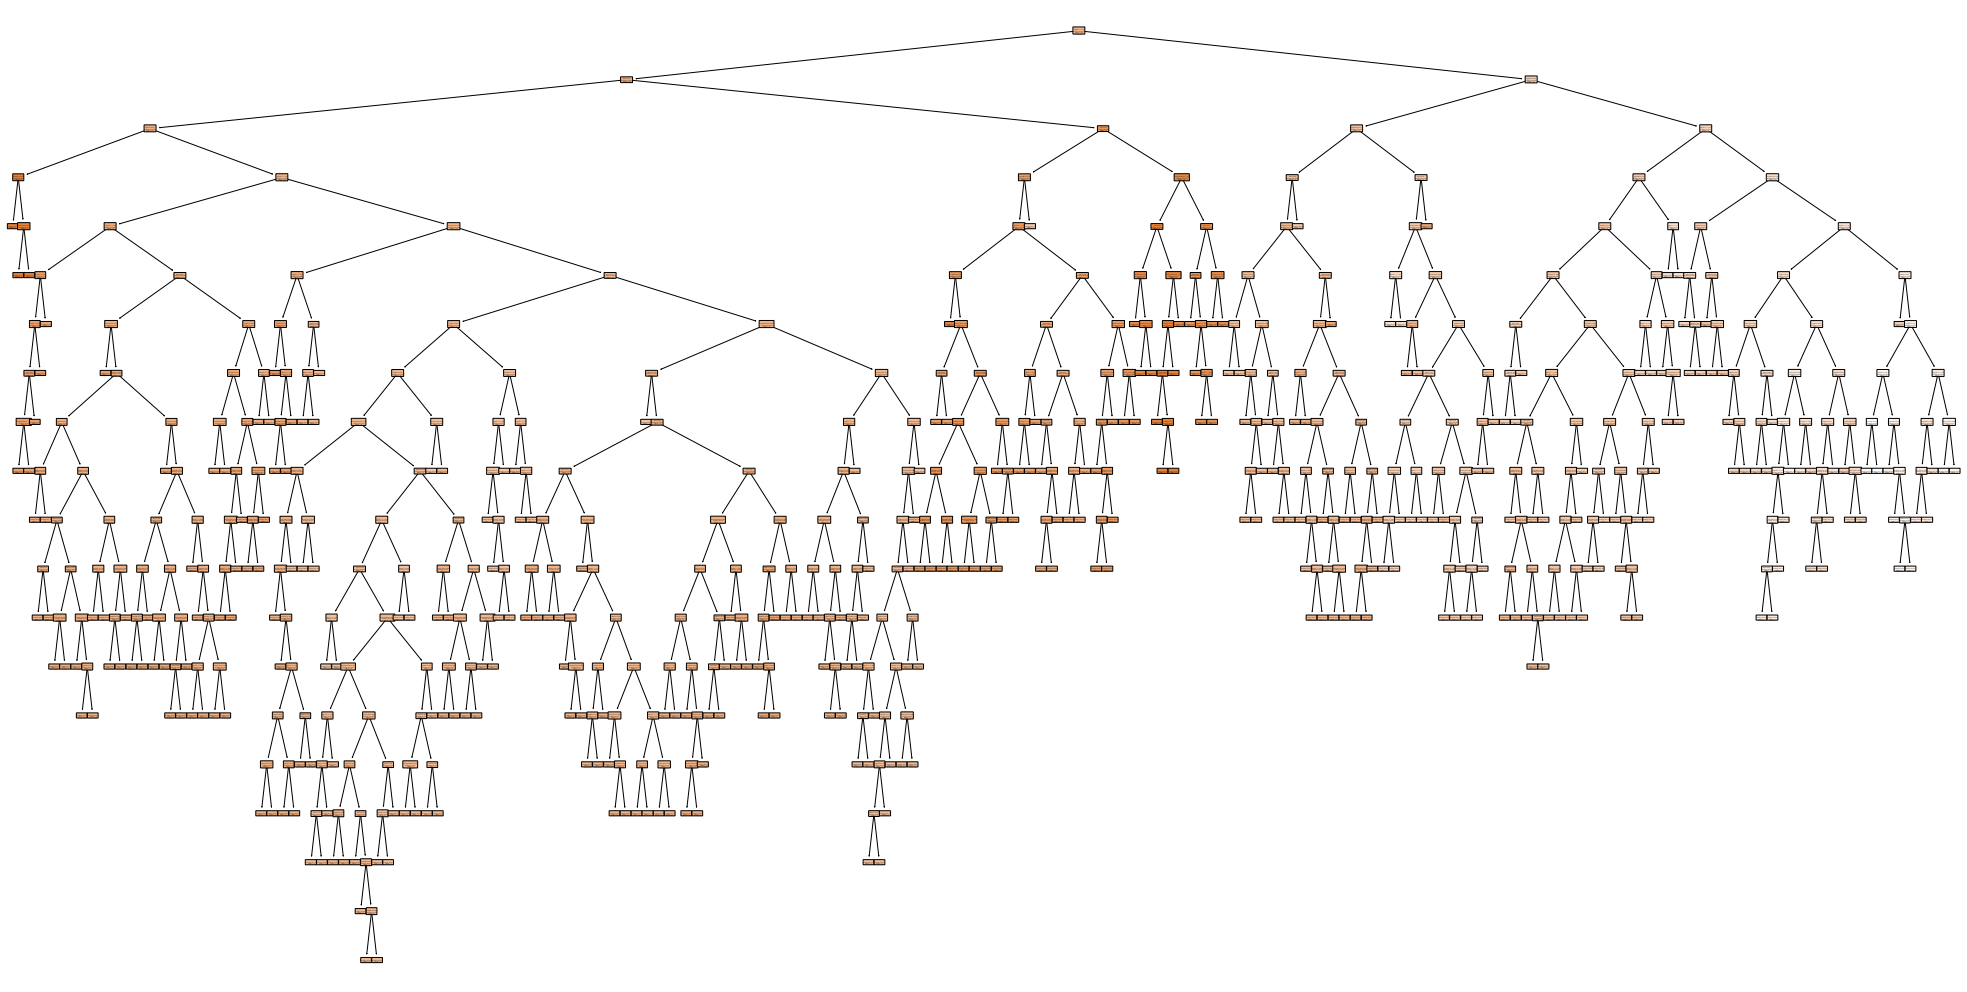

In [ ]:
plt.figure(figsize = (35, 18))
figure = plot_tree(tree, filled = True, rounded = True, class_names = ['NO', 'YES'], feature_names = xbase.columns)

---> Checking the performance of the Decision Tree Regression, we have the following results:<b>

Mean Absolute Error (MAE): 0.06226
Mean Squared Error (MSE): 0.008291
Root Mean Squared Error (RMSE): 0.09105
R-Squared: 0.7431

If we compare these values with the Multiple Linear Regression (interactos without log_ZN variable), we could say that the MAE, MSE, and RMSE increased a few units and the R-squared decreased.
The mean cross-validation score is 70,8655% for the train data and 43,2661%, this means they decreased vs the Multiple Linear Regression results (interactos without log_ZN variable).

Analyzing the performance between the different models, we could say that the Multiple Linear Regression (interactos without log_ZN variable) is the most accurate one because it results in the train and test data and it has the highest scores in the cross-validation indicator.

In [ ]:
forest = RandomForestRegressor(n_estimators = 510, random_state = 1)

In [ ]:
forest.fit(xbase_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_8912\2721580594.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(xbase_train, y_train)


RandomForestRegressor(n_estimators=510, random_state=1)

In [ ]:
importances = forest.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

(-1.0, 12.0)

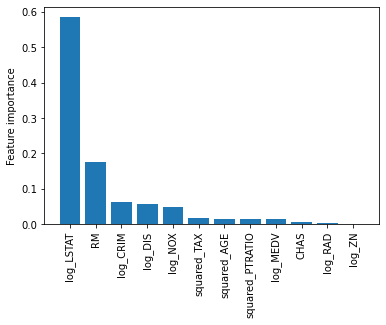

In [ ]:
plt.ylabel('Feature importance')
plt.bar(range(xbase_train.shape[1]), importances[indices], align = 'center')
feat_labels = boston1.columns[1:]
plt.xticks(range(xbase_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, xbase_train.shape[1]])